In [17]:
%reload_ext autoreload
%autoreload
import numpy as np
from algorithm import bfgs, optimize_system
from plot import plot_system
from system import E, E_grad, E_penalty, E_grad_penalty

np.random.seed(0)


1 1 33
2 1 33
3 1 33
4 1 33
5 1 33
6 1 33
7 1 33
8 1 33
9 1 33
10 1 33
error: 1.8821927340496544e-12


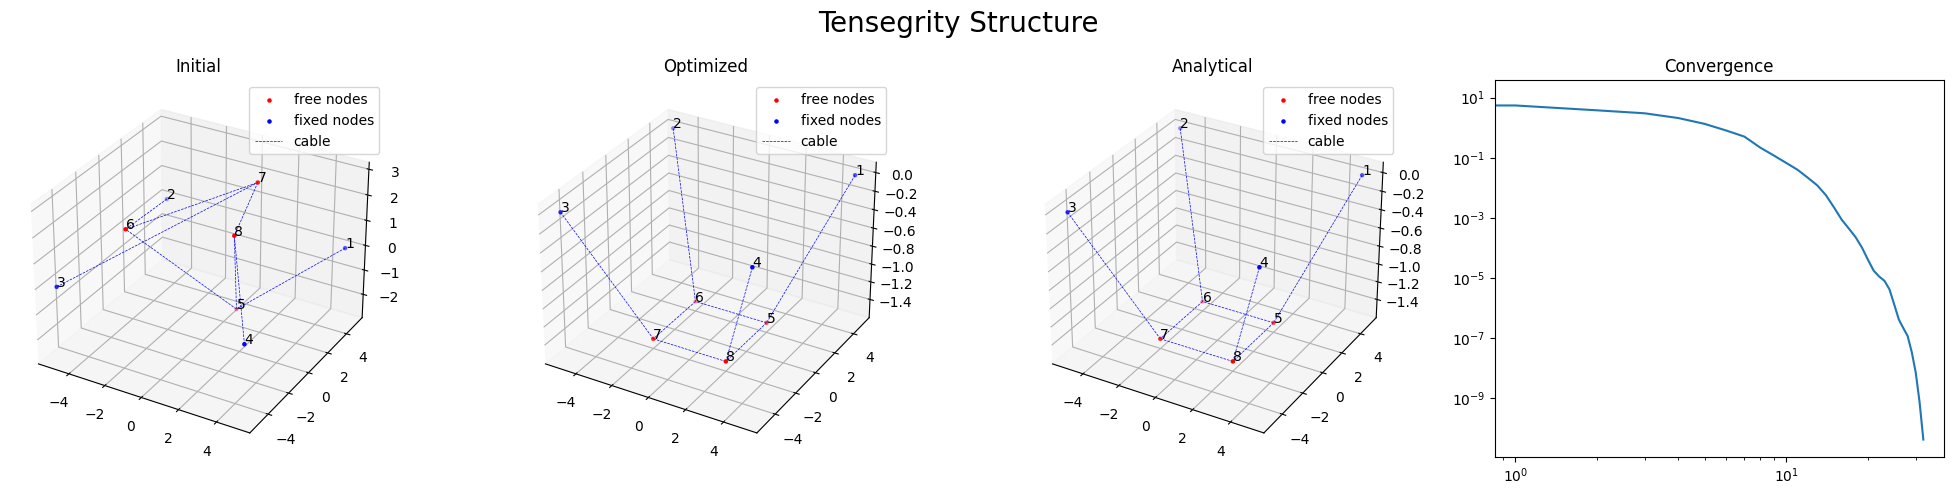

In [18]:
# edges, indexed from 0
edges_cab = [(0, 4), (1, 5), (2, 6), (3, 7), (4, 5), (4, 7), (5, 6), (6, 7)]
edges_bar = []
edges = (edges_cab, edges_bar)

# number of nodes
N = 8

# matrix of cable lengths
l = np.zeros(N**2).reshape(N,N)
for i,j in edges_cab:
    l[i,j] = 3
i_lower = np.tril_indices(N, -1)
l[i_lower] = l.T[i_lower]

# parameters
c = 0
k = 3
rhog = 0

# mass * gravitation
mg = np.zeros(N)
mg[4:] = 1/6

# nodes
X = np.zeros(3*N).reshape(N, 3)

# fixed nodes
p = np.array([[5,5,0], [-5,5,0], [-5,-5,0], [5,-5,0]])

# initial nodes
X = np.random.uniform(low=-3, high=3, size=3*N).reshape(N, 3)
X[:4] = p

# analytical solution
X_analytic = X.copy()
X_analytic[4:] = np.array([[2,2,-3/2], [-2,2,-3/2], [-2,-2,-3/2], [2,-2,-3/2]])

# optimize
X_opt, conv = optimize_system(E, E_grad, X, edges, l, p, mg, k, c, rhog, X_analytic=X_analytic, maxiter=200, eps=1e-12)
print('error:', np.linalg.norm(X_opt - X_analytic))
plot_system(X_opt, X, X_analytic, conv, edges, p)

1 2 321
2 4 321
3 8 321
4 16 321
5 32 321
6 64 321
7 128 321
8 256 321
9 512 321
10 1024 321
error: 2.0692592183368085e-05


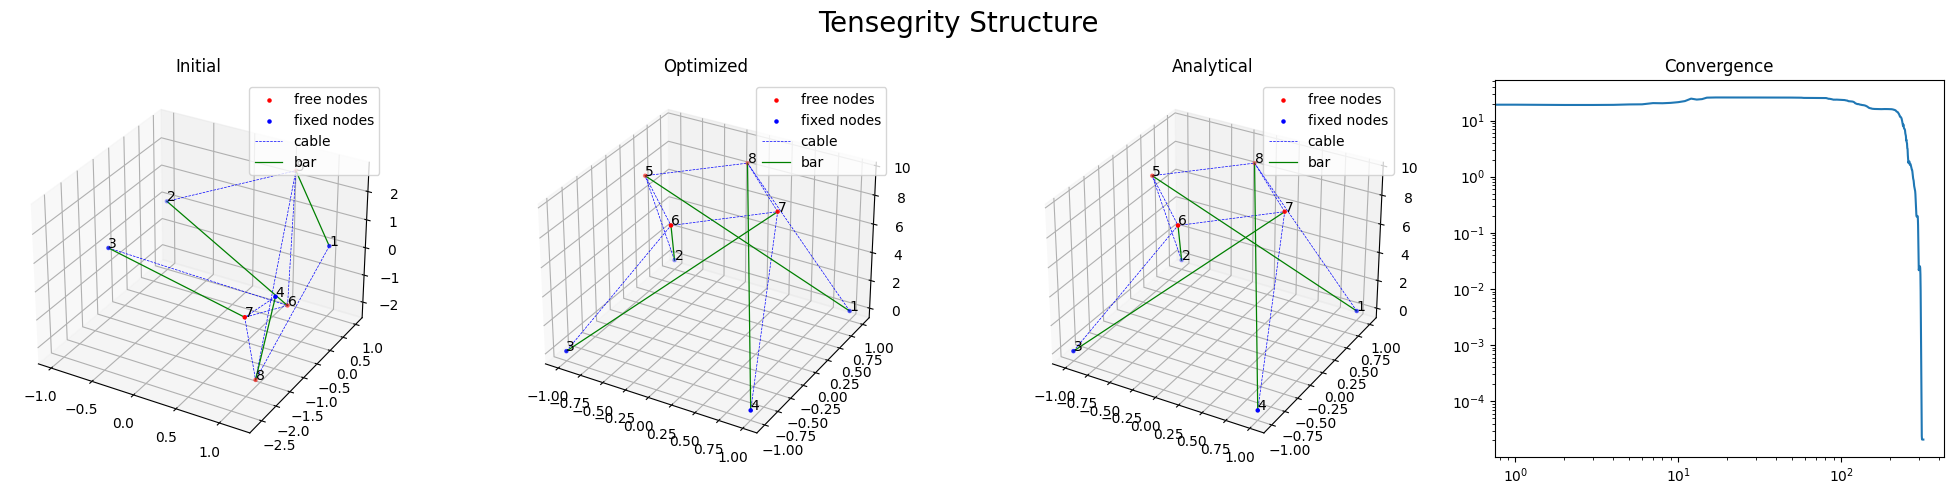

In [19]:
# edges, indexed from 0
edges_cab = [(0, 7), (1, 4), (2, 5), (3, 6), (4, 5), (4, 7), (5, 6), (6, 7)]
edges_bar = [(0, 4), (1, 5), (2, 6), (3, 7)]
edges = (edges_cab, edges_bar)

# number of nodes
N = 8

# matrix of cable and bar lengths
l = np.zeros(N**2).reshape(N,N)
l[0,4] = l[1,5] = l[2,6] = l[3,7] = 10
l[0,7] = l[1,4] = l[2,5] = l[3,6] = 8
l[4,5] = l[5,6] = l[6,7] = l[4,7] = 1
i_lower = np.tril_indices(N, -1)
l[i_lower] = l.T[i_lower]

# parameters
c = 1
k = 0.1
rhog = 0

s = 0.70970
t = 9.54287

# mass * gravitation
mg = np.zeros(N)

# fixed nodes
p = np.array([[1,1,0], [-1,1,0], [-1,-1,0], [1,-1,0]])

# initial nodes
X = np.random.uniform(low=-3, high=3, size=3*N).reshape(N, 3)
X[:4] = p

# analytical solution
X_analytic[:4] = np.array([[1,1,0], [-1,1,0], [-1,-1,0], [1,-1,0]])
X_analytic[4:] = np.array([[-s,0,t], [0,-s,t], [s,0,t], [0,s,t]])

# optimize
X_opt, conv = optimize_system(E, E_grad, X, edges, l, p, mg, k, c, rhog, X_analytic=X_analytic)

print('error:', np.linalg.norm(X_opt - X_analytic))
plot_system(X_opt, X, X_analytic, conv, edges, p)

error: 29.54753868689234


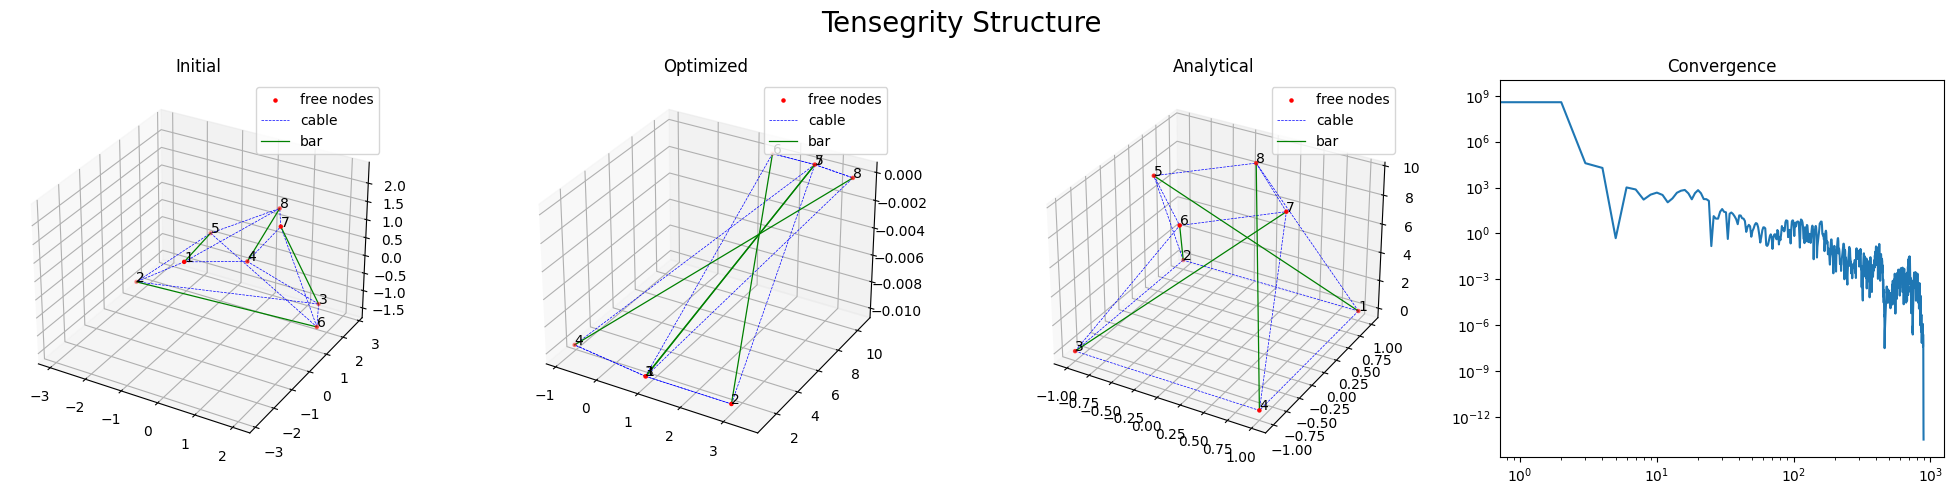

In [22]:
# edges, indexed from 0
edges_cab = [(0, 1), (1, 2), (2, 3), (0, 3), (0, 7), (1, 4), (2, 5), (3, 6), (4, 5), (4, 7), (5, 6), (6, 7)]
edges_bar = [(0, 4), (1, 5), (2, 6), (3, 7)]
edges = (edges_cab, edges_bar)

# number of nodes
N = 8

# matrix of cable and bar lengths
l = np.zeros(N**2).reshape(N,N)
l[0,4] = l[1,5] = l[2,6] = l[3,7] = 10
l[0,1] = l[1,2] = l[2,3] = l[0,3] = 2
l[0,7] = l[1,4] = l[2,5] = l[3,6] = 8
l[4,5] = l[5,6] = l[6,7] = l[4,7] = 1
i_lower = np.tril_indices(N, -1)
l[i_lower] = l.T[i_lower]

# parameters
c = 1
k = 0.1
rhog = 1e-10

# analytic solution parameters
s = 0.70970
t = 9.54287

# mass * gravitation
mg = np.zeros(N)
mg[:4] = 1e-3

# fixed nodes
p = np.empty(shape=(0, 0))

# initial nodes
X = np.random.uniform(low=-3, high=3, size=3*N).reshape(N, 3)

# analytical solution
X_analytic = np.zeros_like(X)
X_analytic[:4] = np.array([[1,1,0], [-1,1,0], [-1,-1,0], [1,-1,0]])
X_analytic[4:] = np.array([[-s,0,t], [0,-s,t], [s,0,t], [0,s,t]])

X_opt, conv, numit = bfgs(E_penalty, E_grad_penalty, X, edges, l, p, mg, k, c, rhog, mu=1e-2, maxiter=2000)

print('error:', np.linalg.norm(X_opt - X_analytic))
plot_system(X_opt, X, X_analytic, conv, edges, p)